In [ ]:
!unzip -q /content/merged_df.csv.zip

In [ ]:
!pip install autoviml sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
sales_merged_df = pd.read_csv("/content/merged_df.csv", parse_dates=['date'])

In [ ]:
sales_merged_df.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,is_train,Wage_day,transactions
0,2013-01-01 00:00:00+00:00,1,AUTOMOTIVE,0.0,0,93.14,1,False,1393
1,2013-01-02 00:00:00+00:00,1,AUTOMOTIVE,2.0,0,93.14,1,False,2111
2,2013-01-03 00:00:00+00:00,1,AUTOMOTIVE,3.0,0,92.97,1,False,1833
3,2013-01-04 00:00:00+00:00,1,AUTOMOTIVE,3.0,0,93.12,1,False,1863
4,2013-01-05 00:00:00+00:00,1,AUTOMOTIVE,5.0,0,93.12,1,False,1509


In [ ]:
df_train = sales_merged_df[sales_merged_df['is_train'] == 1].copy()
df_test = sales_merged_df[sales_merged_df['is_train'] == 0].copy()

In [ ]:
df_test.drop(['is_train'], axis=1, inplace=True)
df_train.drop(['is_train'], axis=1, inplace=True)

In [ ]:
df_train.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,Wage_day,transactions
0,2013-01-01 00:00:00+00:00,1,AUTOMOTIVE,0.0,0,93.14,False,1393
1,2013-01-02 00:00:00+00:00,1,AUTOMOTIVE,2.0,0,93.14,False,2111
2,2013-01-03 00:00:00+00:00,1,AUTOMOTIVE,3.0,0,92.97,False,1833
3,2013-01-04 00:00:00+00:00,1,AUTOMOTIVE,3.0,0,93.12,False,1863
4,2013-01-05 00:00:00+00:00,1,AUTOMOTIVE,5.0,0,93.12,False,1509


                                             |          | [  0%]   00:00 -> (? left)


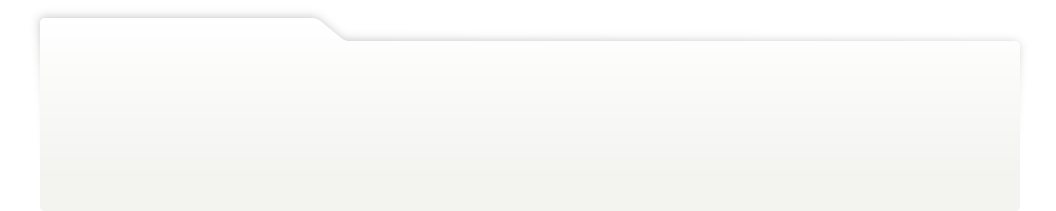
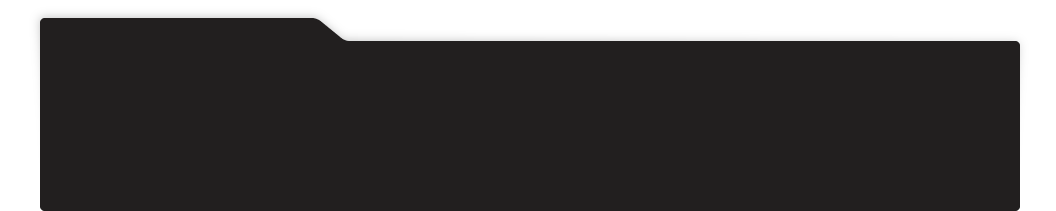
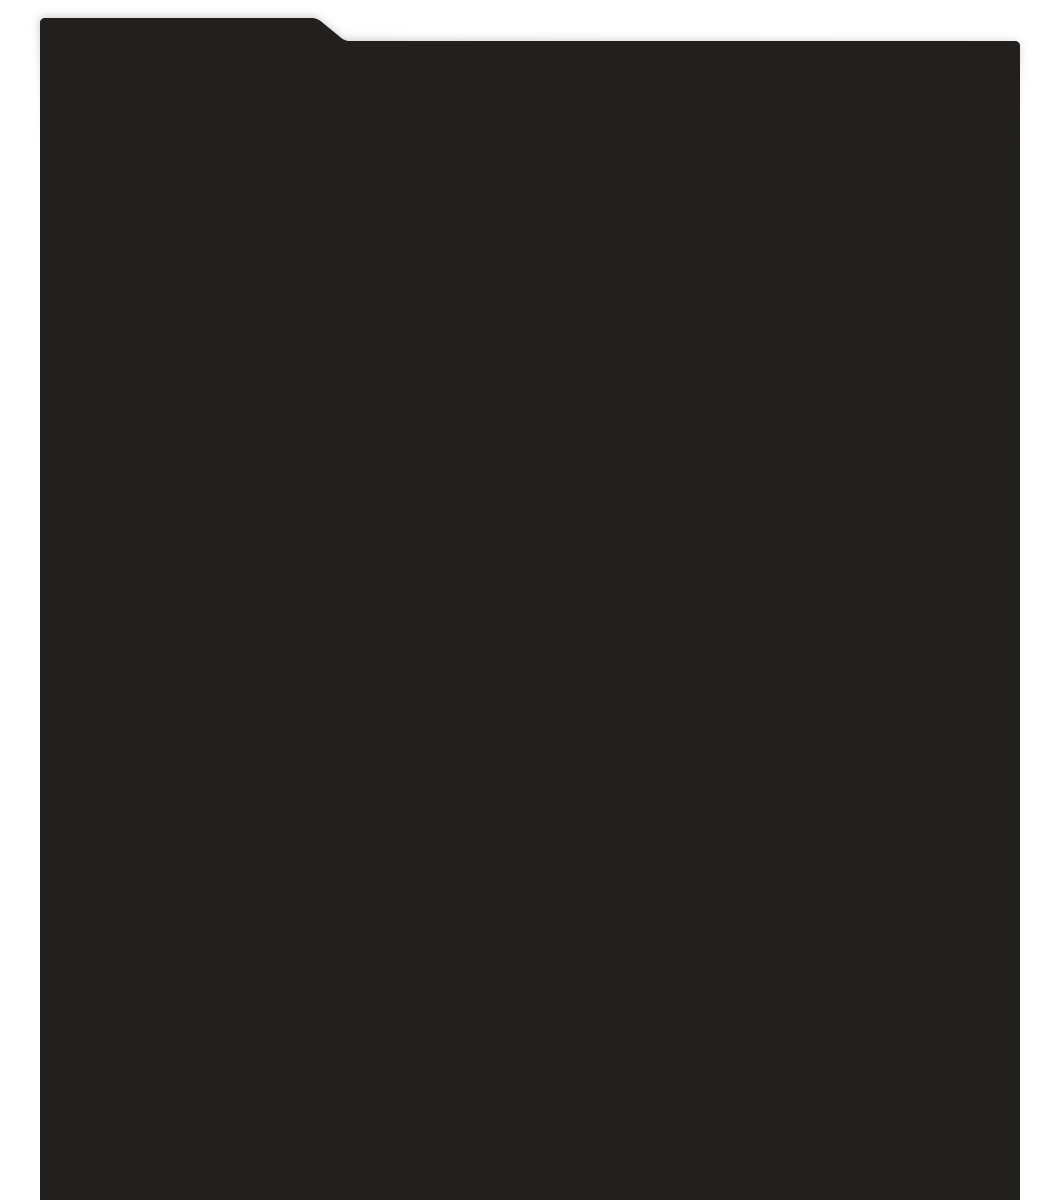
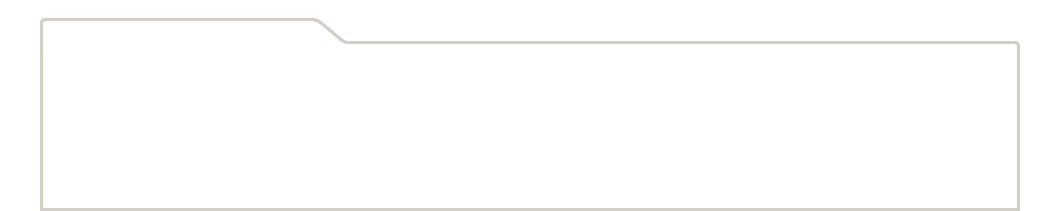
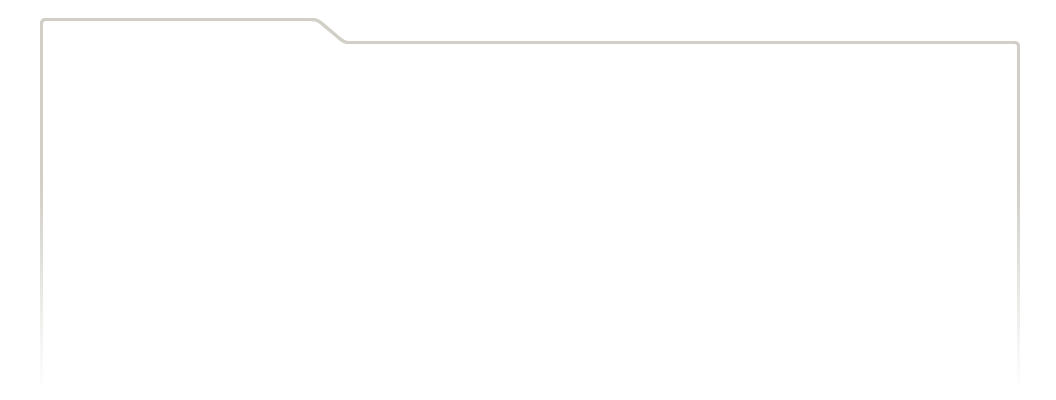
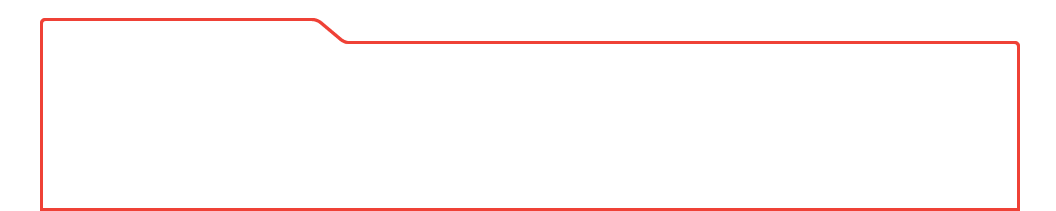
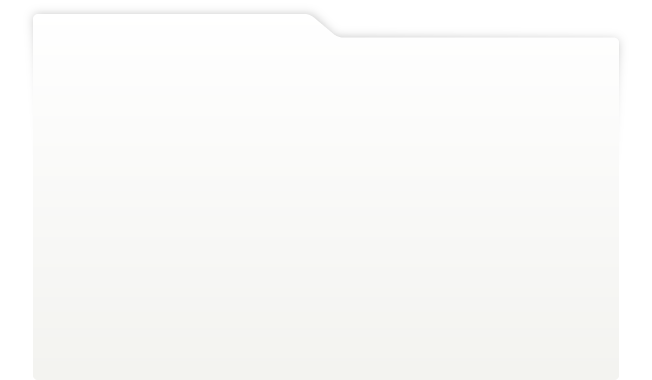
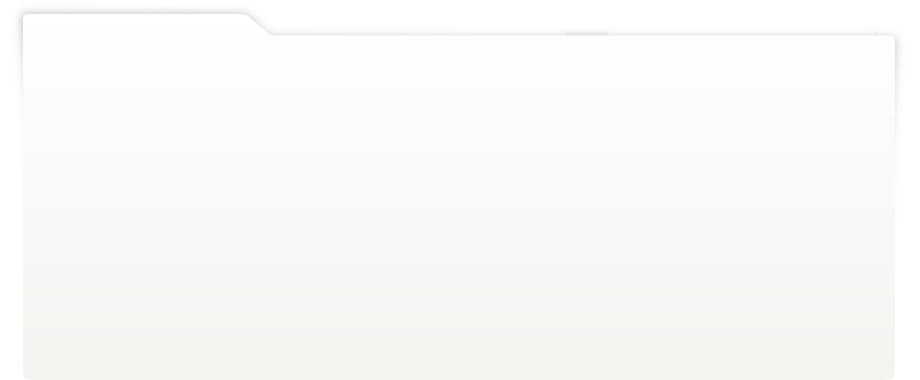
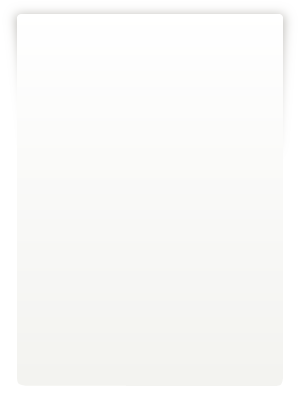
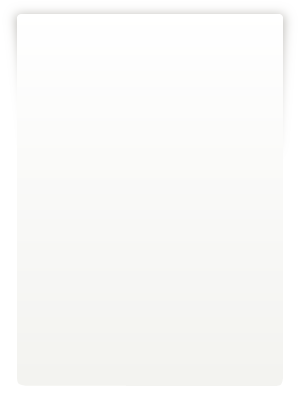
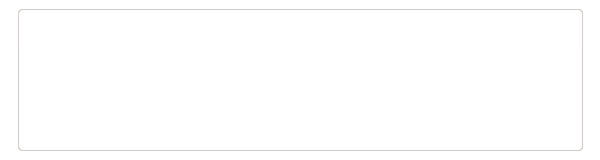
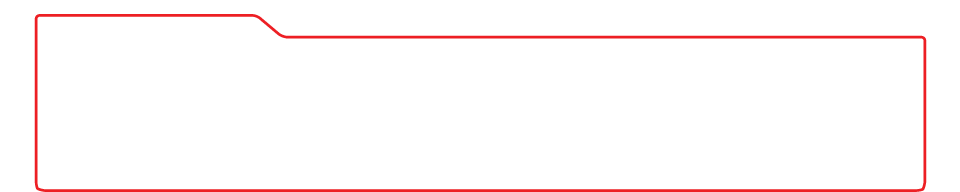
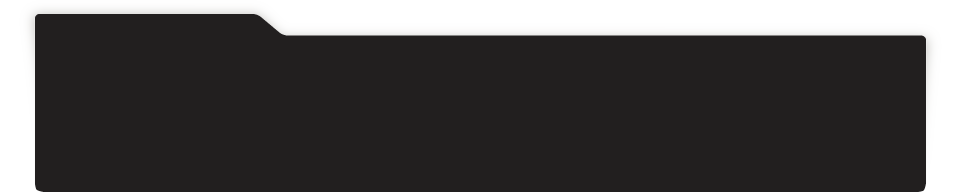
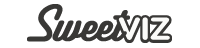
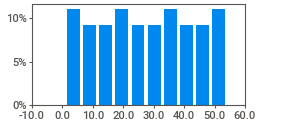
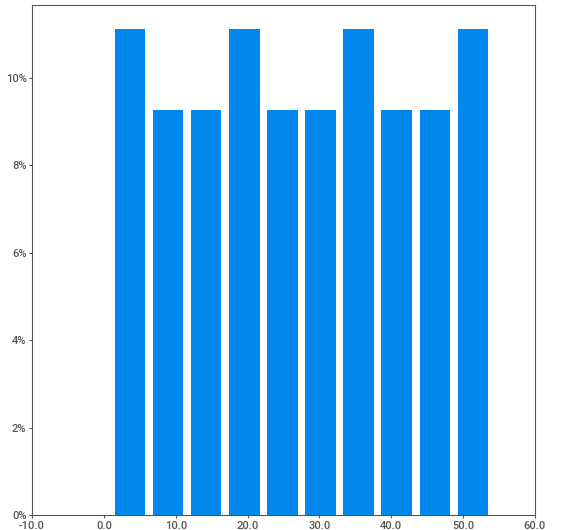
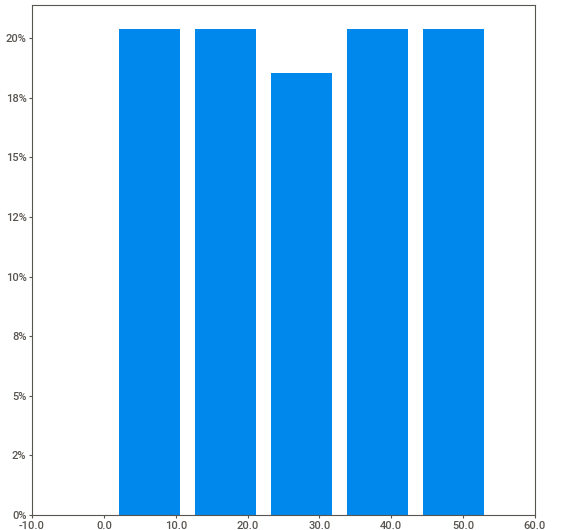
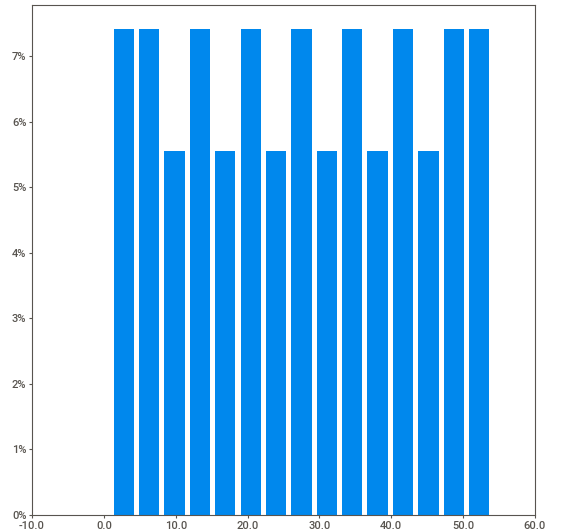
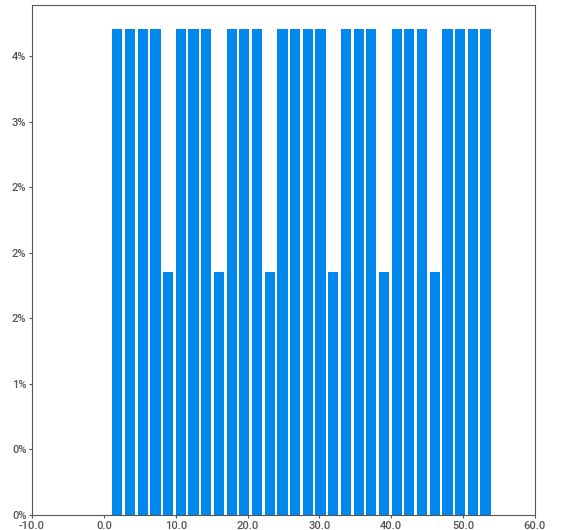
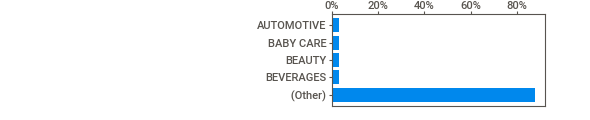
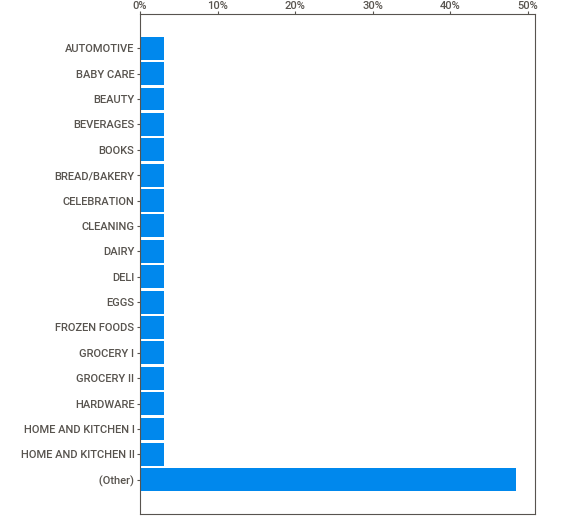
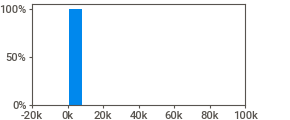
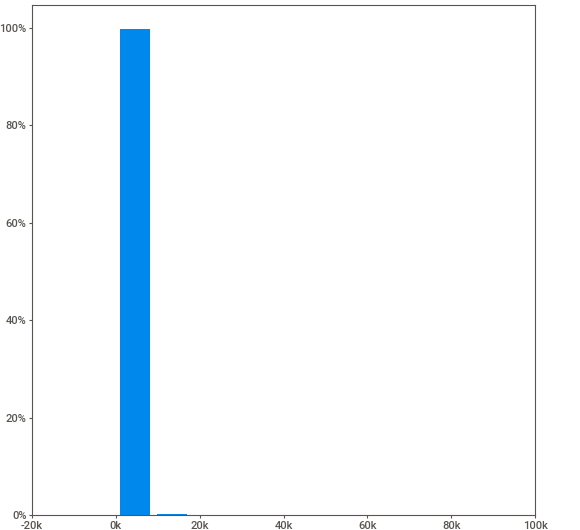
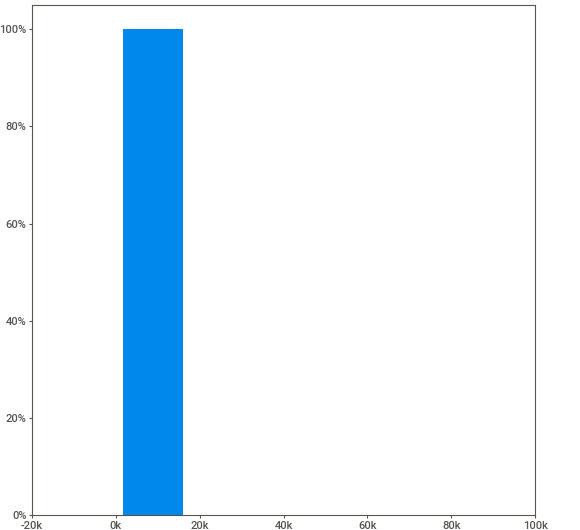
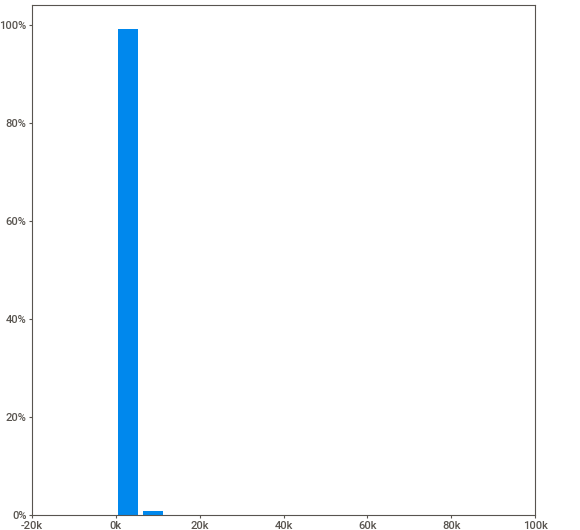
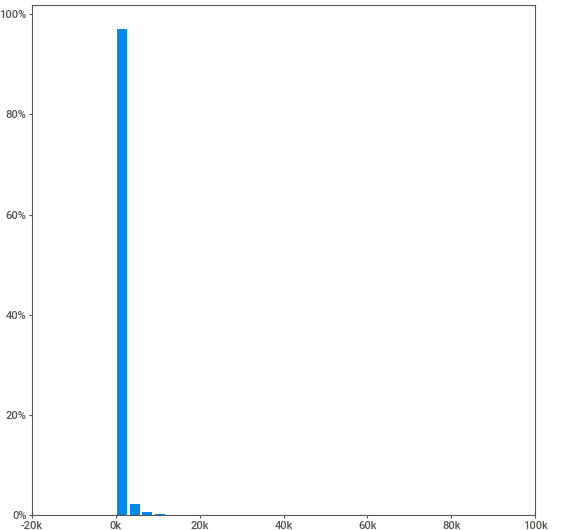
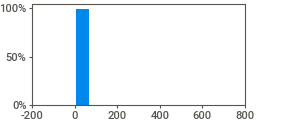
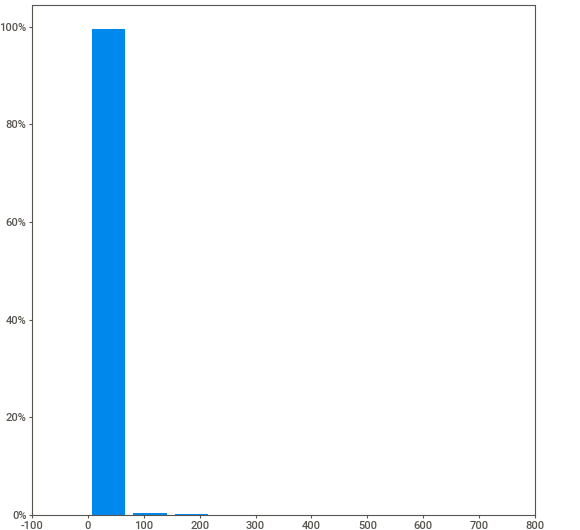
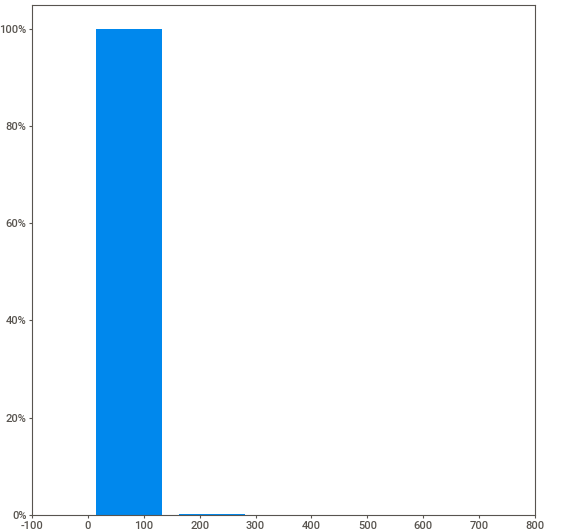
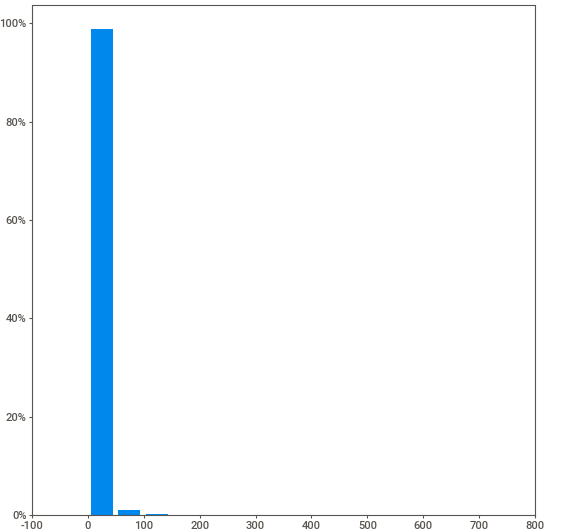
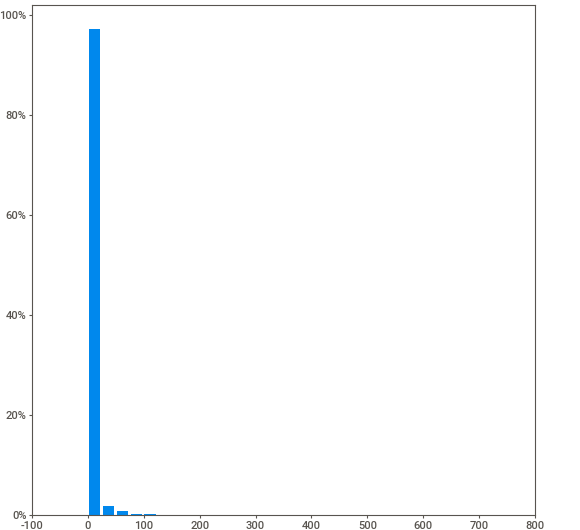
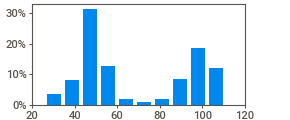
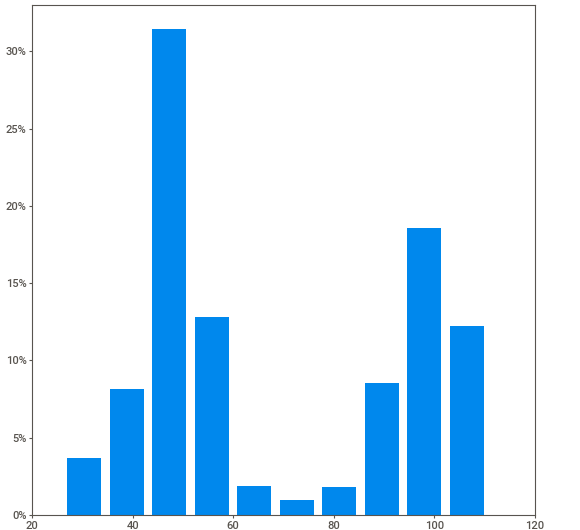
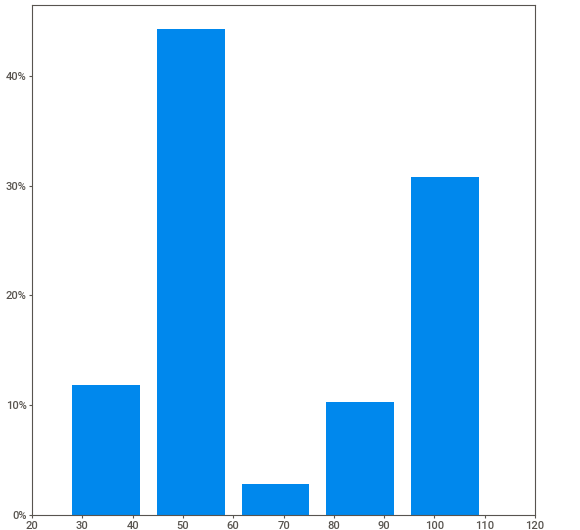
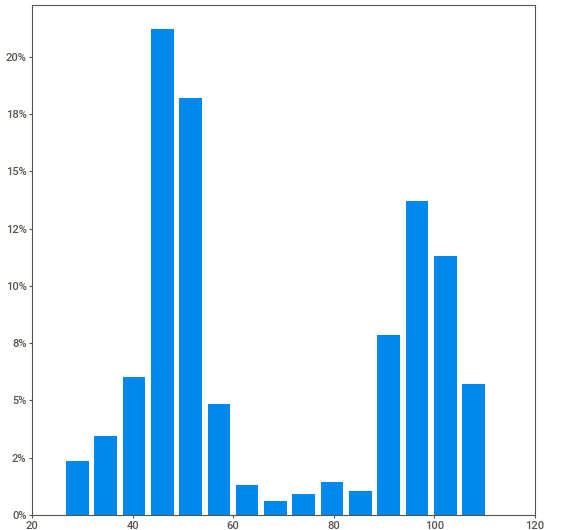
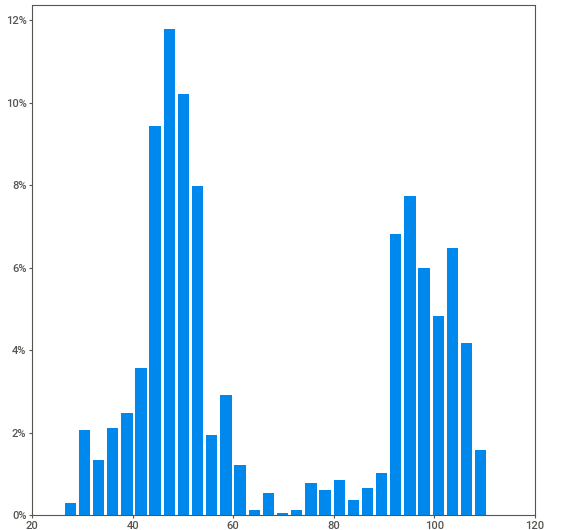
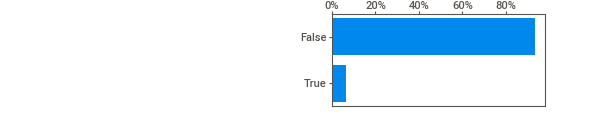
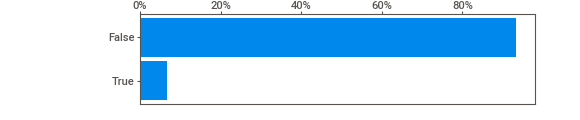
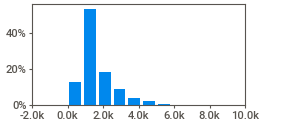
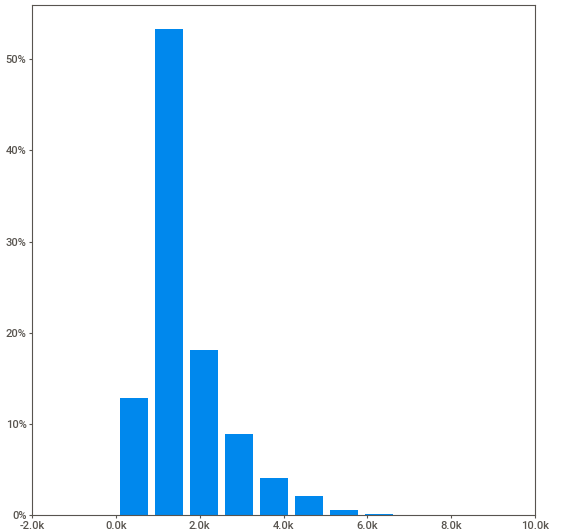
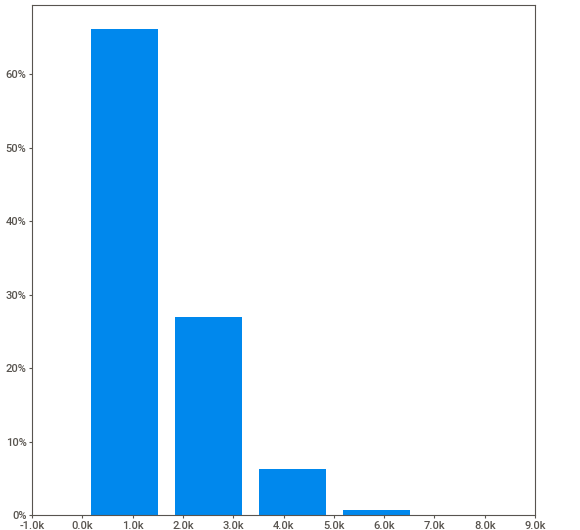
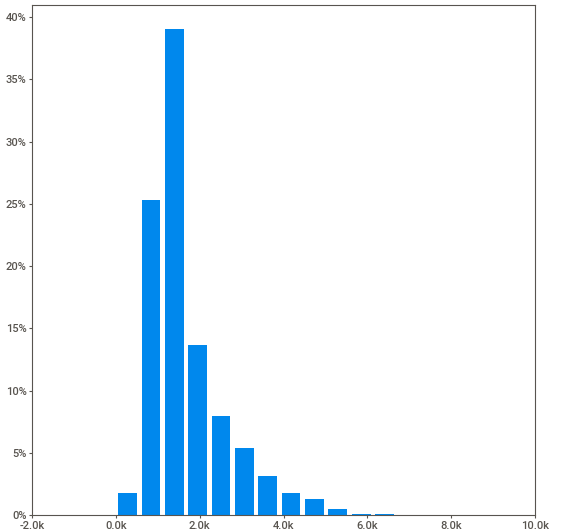
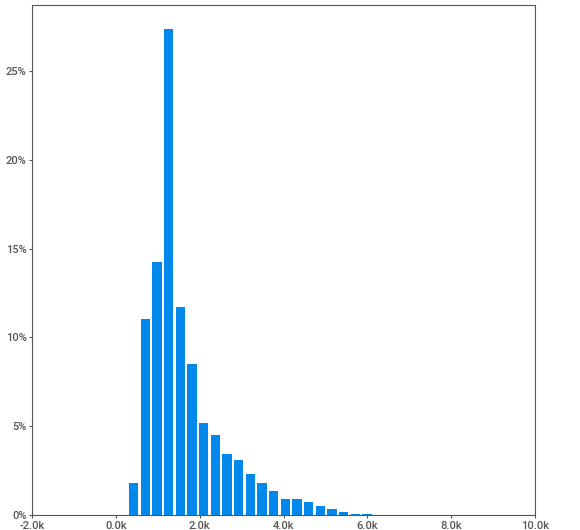
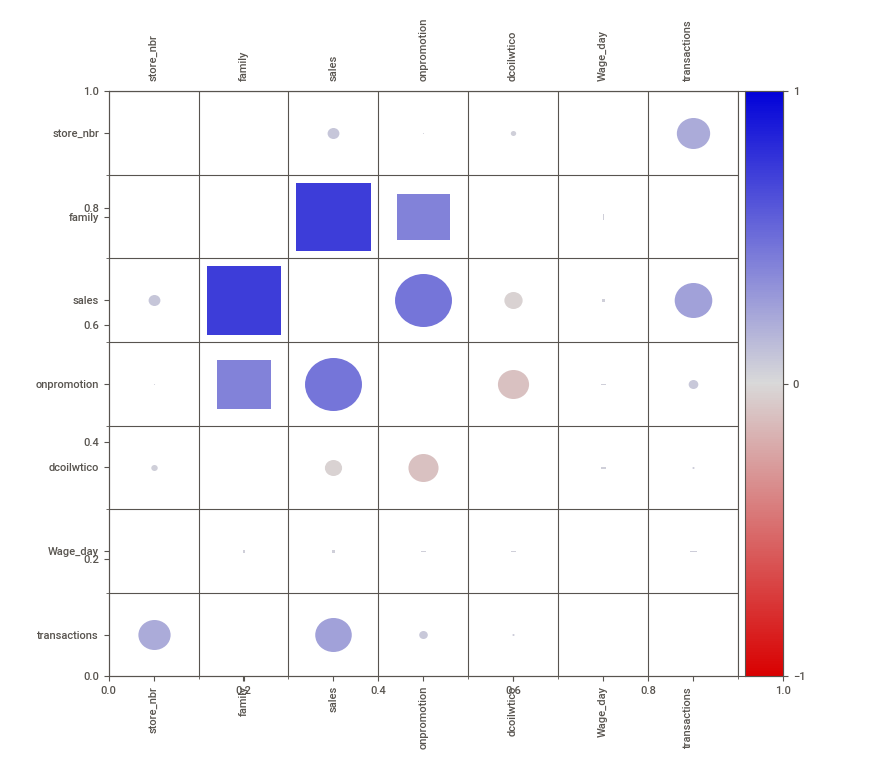
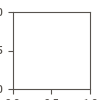

In [ ]:
import sweetviz as sv

report = sv.analyze(df_train)
report.show_notebook()

In [ ]:
target = 'sales'
X = df_train.drop(columns=[target, "date"])
y = df_train[target]

In [ ]:
import numpy as np

# Custom function to replace scipy's deprecated interp
def interp(x, xp, fp):
    return np.interp(x, xp, fp)


In [ ]:
!sed -i 's/from scipy import interp/import numpy as np\ninterp = lambda x, xp, fp: np.interp(x, xp, fp)/' /usr/local/lib/python3.10/dist-packages/autoviml/Auto_ViML.py


In [ ]:
from sklearn.model_selection import train_test_split

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train[target] = y_train

In [ ]:
!sed -i 's/astype(np.bool)/astype(bool)/g' /usr/local/lib/python3.10/dist-packages/autoviml/sulov_method.py

In [ ]:
X_train.head()

,store_nbr,family,onpromotion,dcoilwtico,Wage_day,transactions,sales
2172115,40,GROCERY I,58,54.00,True,884,"2,967.00"
346923,7,DELI,0,43.19,False,1711,188.88
2388388,44,EGGS,0,107.49,True,3720,614.00
1974782,36,PET SUPPLIES,0,44.36,False,1172,8.00
1120443,21,EGGS,0,57.29,False,1393,0.00


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (2359368, 7)
    Training Set Memory Usage = 128.25 MB
Test Set Shape = (589842, 6)
    Test Set Memory Usage = 27.56 MB
Single_Label Target: ['sales']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    

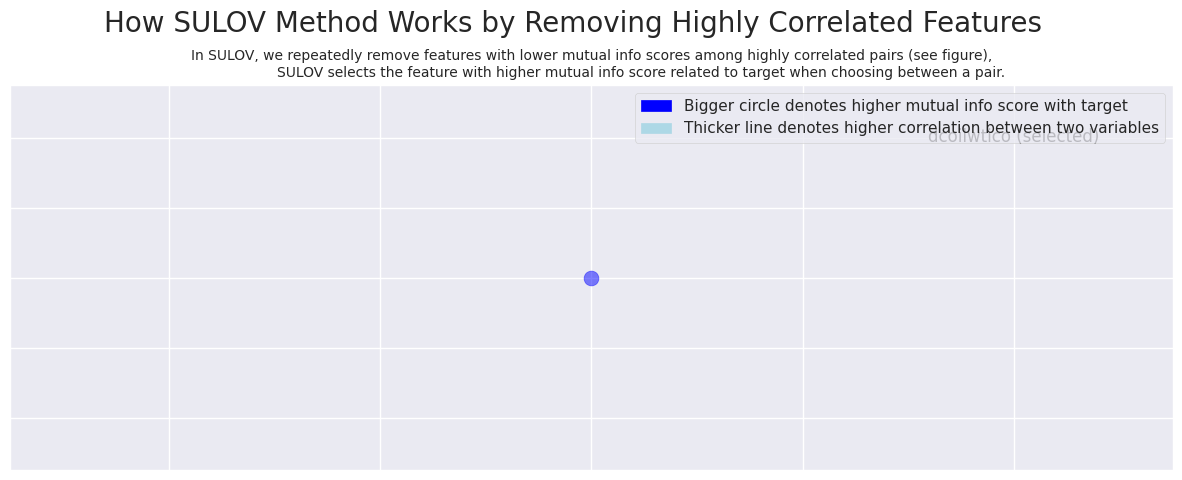

Splitting selected features into float and categorical (integer) variables:
    (1) float variables ...
    (5) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 6 
    Finding Important Features using Boosted Trees algorithm...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 6 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  1887494 , CV rows =  471874
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
##############################

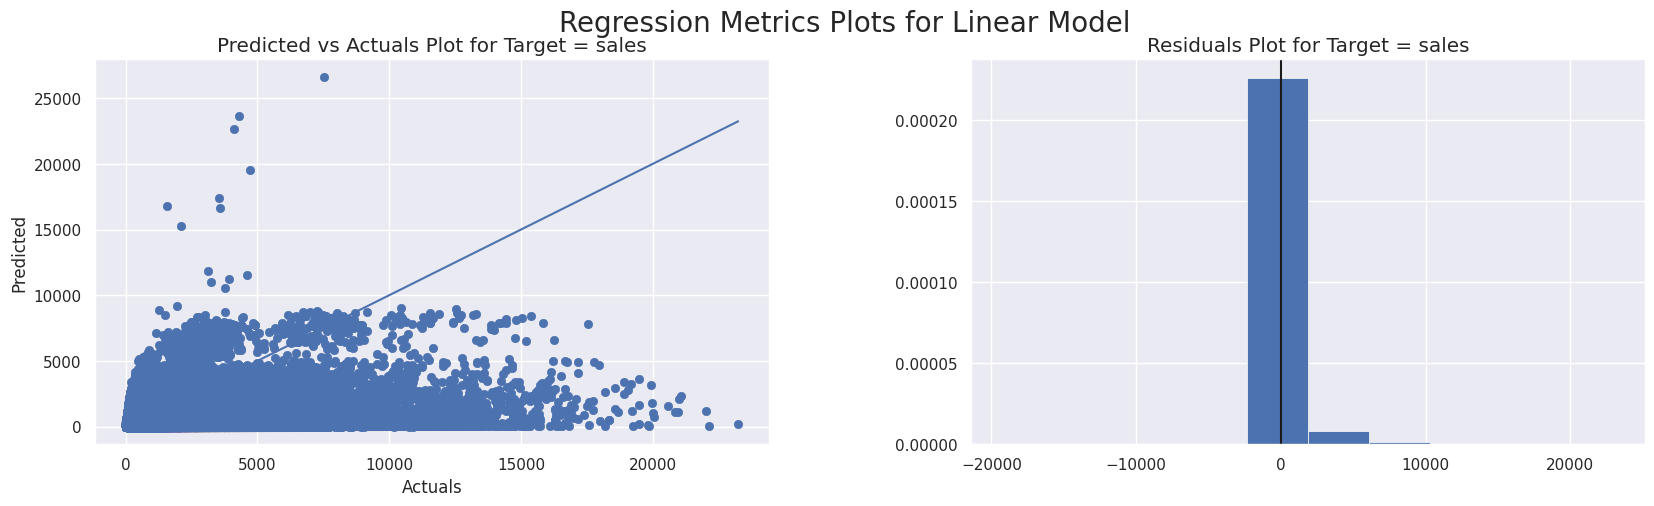

<Figure size 1500x500 with 0 Axes>

In [ ]:
from autoviml.Auto_ViML import Auto_ViML

result = Auto_ViML(
    train=X_train, target=target, test=X_test, scoring_parameter='r2',
    hyper_param='RS', feature_reduction=True, verbose=1
)

In [ ]:
model = result[0]
model

LinearSVR(C=99.06273994707962, epsilon=0.006825733043655191, max_iter=10000,
          random_state=99, tol=0.001)

In [ ]:
result[1]


['family',
 'onpromotion',
 'transactions',
 'store_nbr',
 'dcoilwtico',
 'Wage_day']

In [ ]:
result[2]

,family,onpromotion,transactions,store_nbr,dcoilwtico,Wage_day,sales
2172115,12,58,884,40,54.00,1,"2,967.00"
346923,9,0,1711,7,43.19,0,188.88
2388388,10,0,3720,44,107.49,1,614.00
1974782,26,0,1172,36,44.36,0,8.00
1120443,10,0,1393,21,57.29,0,0.00
...,...,...,...,...,...,...,...
1709095,32,0,1191,31,44.65,0,9.00
2379098,4,0,3656,44,43.96,0,0.00
2250620,26,0,1024,41,53.18,0,9.00
2795059,22,0,1416,51,31.40,0,183.00


In [ ]:
result[3]

,family,onpromotion,transactions,store_nbr,dcoilwtico,Wage_day,sales_Adaboost_predictions,sales_Bagging_Regressor_predictions,sales_KNN_Regressor_predictions,sales_Decision_Tree_predictions,sales_Linear_predictions,sales_Ensembled_predictions,sales_predictions
768114,0.94,0.00,0.16,0.25,0.07,0.00,539.68,505.48,"1,375.39",355.41,10.34,352.17,10.34
524215,0.50,0.00,0.11,0.17,0.16,0.00,539.68,851.63,384.75,355.41,6.92,269.90,6.92
1345301,0.41,0.00,0.07,0.45,0.80,0.00,539.68,192.77,100.25,356.57,1.30,149.31,1.30
2724005,0.41,0.00,0.27,0.92,0.91,0.00,539.68,375.80,65.84,332.61,11.94,170.21,11.94
1392127,0.25,0.00,0.08,0.47,0.90,0.00,539.68,720.93,273.61,346.30,1.62,235.88,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835848,0.28,0.00,0.35,0.62,0.12,0.00,539.68,551.90,560.66,355.41,19.86,260.89,19.86
905288,0.41,0.00,0.18,0.30,0.16,0.00,539.68,240.94,213.37,355.41,10.92,174.14,10.92
1127630,0.44,0.00,0.11,0.38,0.23,0.00,539.68,136.57,161.50,344.22,6.20,150.85,6.20
984942,0.88,0.00,0.13,0.32,0.34,0.00,539.68,791.71,569.24,356.57,116.04,340.17,116.04
